## <center> Аттестация. Практическое задание в Jupiter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований.
Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах: 
* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день

То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.


In [52]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 

1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями: </p>
    $$x^*_i  = \frac{x_{i-1} - x_{i+1}}{2}$$ 
    
Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.


In [53]:
solar_power = pd.read_csv('solarpower.zip', sep = ',')
for i,j in enumerate(solar_power['cum_power']):
    if solar_power['cum_power'].loc[i] == -1:
        solar_power['cum_power'].loc[i] = (solar_power['cum_power'].loc[i-1] - solar_power['cum_power'].loc[i+1])/2

2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

    После чего создайте данные о ежемесячной выработке энергии на каждый год. 
    
Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [54]:
solar_power['day_power'] = np.nan
solar_power['day_power'] = solar_power['cum_power'].diff()
solar_power['day_power'] = solar_power['day_power'].fillna(0)
solar_power['date'] = pd.to_datetime(solar_power['date'])
power_per_month = solar_power.groupby(solar_power['date'].dt.to_period('M')).sum()
power_per_month = power_per_month.drop('cum_power', axis=1)

3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

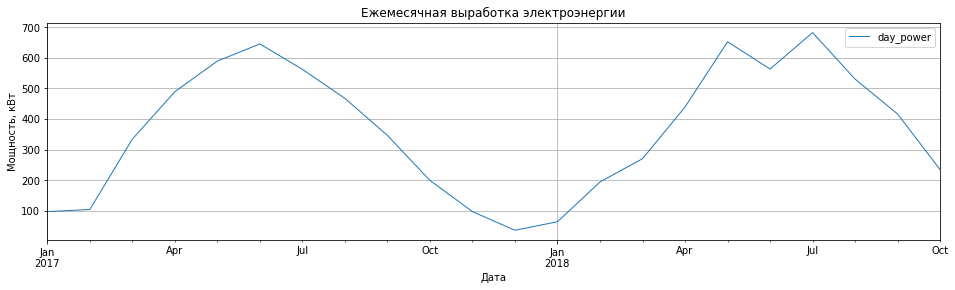

In [57]:
power_per_month.plot(
    kind='line',
    figsize=(16, 4),
    title='Ежемесячная выработка электроэнергии',
    grid = True,
    lw=1,
    xlabel = 'Дата',
    ylabel = 'Мощность, кВт'
);

Наибольшая выработка солнечной энергии наблюдается в летнее время года. Спад происходит в зимнее время года в соответствии с сокращением количества солнечных дней.